In [16]:
#required Libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import glob2
import os, fnmatch
from pathlib import Path
import mtcnn

# Processing the Videos

In [17]:
#importing file function
def find_files(directory, pattern):
    for root, dirs, files in os.walk(directory):
        for basename in files:
            if fnmatch.fnmatch(basename, pattern):
                filename = os.path.join(root, basename)
                yield filename


In [18]:
file_name = []

In [19]:
for filename in find_files('/Documents/Third_Semester/695/projects/Deepfake', '*.avi'):
    file_name.append(filename)

In [20]:
# reading video fame
# Create a VideoCapture object and read from input file

def extract_multiple_videos(intput_filenames, image_path_infile):
    """Extract video files into sequence of images.
       Intput_filenames is a list for video file names"""

    i = 1  # Counter of first video

    # Iterate file names:
    cap = cv2.VideoCapture('/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/VidTIMIT/mstk0/sa1.avi')
        
    if (cap.isOpened()== False):
        print("Error opening video stream or file")

        
    # Keep iterating break
    while True:
        ret, frame = cap.read()  # Read frame from first video
            
        if ret:
#           cv2.imwrite(str(i) + '.jpg', frame)  # Write frame to JPEG file (1.jpg, 2.jpg, ...)
            cv2.imwrite(os.path.join(image_path_infile , str(i) + '.jpg'), frame)  # Write frame to JPEG file (1.jpg, 2.jpg, ...)

#           cv2.imshow('frame', frame)  # Display frame for testing
            i += 1 # Advance file counter
        else:
            # Break the interal loop when res status is False.
            break

        cv2.waitKey(100) #Wait 100msec (for debugging)

    cap.release() #Release must be inside the outer loop

In [21]:
# Create a VideoCapture object and read from input file
base_path = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/'
real_image_path_for_frame = base_path + 'images/real'
fake_image_path_for_frame = base_path + 'images/fake'

# for real uncomment this and run
real_video_name = base_path +'VidTIMIT/mstko/sa1.avi'

#for fake uncomment this and run
fake_video_name = base_path + '/DeepfakeTIMIT/higher_quality/mstk0/sa1-video-mrjo0.avi'


extract_multiple_videos(real_video_name, real_image_path_for_frame)
extract_multiple_videos(fake_video_name, fake_image_path_for_frame)

# Creating a histograme to show images differences

Create a historgam for Real Images

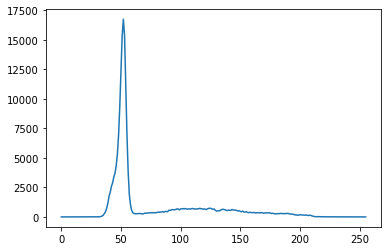

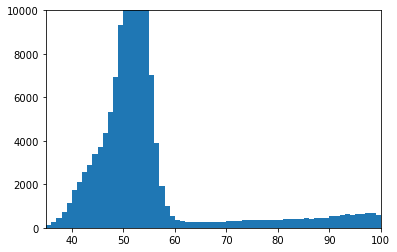

In [22]:
# for the real images
# find frequency of pixels in range 0-255 
img = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/real/90.jpg'
imgs = cv2.imread(img, 0)
histrReal = cv2.calcHist([imgs],[0],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histrReal) 
plt.show() 

# alternative way to find histogram of an image 
plt.hist(imgs.ravel(),256,[0,256]) 
plt.axis([35,100,0,10000])
# plt.axis([35,100,15250,17000])
plt.savefig('real_image_histogram.png')
plt.show()


Create a historgam for fake Images

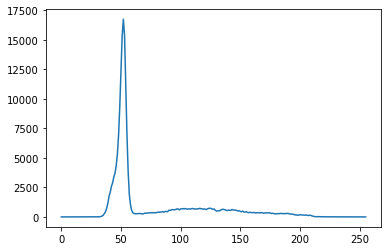

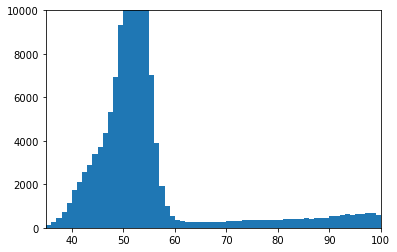

In [23]:
# for the fake images
# find frequency of pixels in range 0-255 
img = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/fake/90.jpg'
imgs = cv2.imread(img, 0)
histrFake = cv2.calcHist([imgs],[0],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histrFake) 
plt.show() 

# alternative way to find histogram of an image 
plt.hist(imgs.ravel(),256,[0,256]) 
# plt.axis([35,100,15250,17000])
plt.axis([35,100,0,10000])
plt.savefig('fake_image_histogram.png')
plt.show() 

In [24]:
cv2.compareHist(histrFake, histrReal, cv2.HISTCMP_CORREL)

1.0

In [25]:
cv2.compareHist(histrFake, histrReal, cv2.HISTCMP_INTERSECT)

196608.0

# Perform face detection

In [28]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

In [29]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list, face_filename):
    # load the image
    data = pyplot.imread(filename)
    for i in range(len(result_list)):
    # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        pyplot.imshow(data[y1:y2, x1:x2])
        pyplot.savefig('Dataset/only_face/'+ face_filename)
# show the plot
pyplot.show()

<ipython-input-29-2910a02a26d5>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(1, len(result_list), i+1)


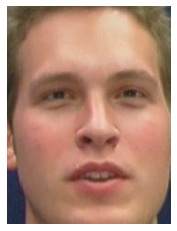

In [30]:
#this is not the actual solution. it's someting i experimented
i = 0
for filename in find_files('/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/', '*.jpg'):
    i += 1
    face_filename = str(i) + '.jpg'
    # display faces on the original image
    draw_image_with_boxes(filename, faces,face_filename)

In [31]:
# this is the solution for 1.3
# reading video fame
# Create a VideoCapture object and read from input file

def extract_multiple_videos_faces(intput_video_file_names, image_path_infile):
    """Extract video files into sequence of images.
       Intput_filenames is a list for video file names"""

    i = 1  # Counter of first video

    # Iterate file names:
    cap = cv2.VideoCapture('/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/VidTIMIT/mstk0/sa1.avi')
        
    if (cap.isOpened()== False):
        print("Error opening video stream or file")

        
    # Keep iterating break
    while True:
        ret, frame = cap.read()  # Read frame from first video
            
        if ret:
            
#           cv2.imwrite(str(i) + '.jpg', frame)  # Write frame to JPEG file (1.jpg, 2.jpg, ...)
#             this code can be use to do 1.2.3 and 1.3, but i am only doing 1.3 now
#             cv2.imwrite(os.path.join(image_path_infile , str(i) + '.jpg'), frame)  # Write frame to JPEG file (1.jpg, 2.jpg, ...)
                
#           cv2.imshow('frame', frame)  # Display frame for testing
    
            filename = os.path.join(image_path_infile , str(i) + '.jpg') 
        
        # this line feels little odd. Cause it looks 
        # like i am reading it mannually but if i uncomment above line it will be dynamic everytime, cause those line 
        # creates the frame in the folder first.
        
            # load image from file
            pixels = pyplot.imread(filename)
            # create the detector, using default weights
            detector = MTCNN()
            # detect faces in the image
            faces = detector.detect_faces(pixels)
            # display faces on the original image
            face_filename_crp = str(i) + '.jpg'
            draw_image_with_boxes(filename, faces, face_filename_crp)
        
    
            i += 1 # Advance file counter
        
            face_filename = str(i) + '.jpg'
            # display faces on the original image
            draw_image_with_boxes(filename, faces,face_filename)
        else:
            # Break the interal loop when res status is False.
            break

        cv2.waitKey(100) #Wait 100msec (for debugging)

    cap.release() #Release must be inside the outer loop



<ipython-input-29-2910a02a26d5>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(1, len(result_list), i+1)


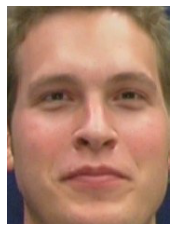

In [33]:
# calling a function

video_file_path = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/VidTIMIT/mstk0/sa1.avi'

base_path = '/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/'
real_image_path_for_frame = base_path + 'images/real'
fake_image_path_for_frame = base_path + 'images/fake'

extract_multiple_videos_faces(video_file_path,real_image_path_for_frame)

# if you want to detect face for fake video just change the url

# This is the end of 1.3